# Map Projections

- Depends on the __PROJ library__ via `pyproj`
- crs is stored in a `CRS` object from `pyproj`
- uses `.to_crs()` method
- must pat attention to degrees vs cartesion coordinates

- WGS84 / ESPG 4326: most common but distorts areas away from equator
- ETRS-LAEA / ESPG 3035: Lambert Azimuthal Equal Area, for country-level Europe data

__Reproject from WGS84 to Lambert Azimuthal Equal Area__

Recommended for Europe

In [21]:
import geopandas as gpd 
fp = "data/ch6/EU_countries/eu_countries_2022.gpkg"
data = gpd.read_file(fp)

print(type(data.crs))

data.crs

<class 'pyproj.crs.crs.CRS'>


<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [22]:
data["geometry"].head()

0    MULTIPOLYGON (((13.684 46.4375, 13.511 46.3484...
1    MULTIPOLYGON (((6.3156 50.497, 6.405 50.3233, ...
2    MULTIPOLYGON (((28.498 43.4341, 28.0602 43.316...
3    MULTIPOLYGON (((16.9498 48.5358, 16.8511 48.43...
4    MULTIPOLYGON (((32.9417 34.6418, 32.559 34.687...
Name: geometry, dtype: geometry

Coordinates appear to be in decimal degrees

In [23]:
data_wgs84 = data.copy()

data = data.to_crs(epsg=3035)
data["geometry"].head()

0    MULTIPOLYGON (((4604288.477 2598607.47, 459144...
1    MULTIPOLYGON (((4059689.242 3049361.18, 406508...
2    MULTIPOLYGON (((5805367.757 2442801.252, 57739...
3    MULTIPOLYGON (((4833567.363 2848881.974, 48272...
4    MULTIPOLYGON (((6413299.362 1602181.345, 63782...
Name: geometry, dtype: geometry

In [24]:
data.crs

<Projected CRS: EPSG:3035>
Name: ETRS89-extended / LAEA Europe
Axis Info [cartesian]:
- Y[north]: Northing (metre)
- X[east]: Easting (metre)
Area of Use:
- name: Europe - European Union (EU) countries and candidates. Europe - onshore and offshore: Albania; Andorra; Austria; Belgium; Bosnia and Herzegovina; Bulgaria; Croatia; Cyprus; Czechia; Denmark; Estonia; Faroe Islands; Finland; France; Germany; Gibraltar; Greece; Hungary; Iceland; Ireland; Italy; Kosovo; Latvia; Liechtenstein; Lithuania; Luxembourg; Malta; Monaco; Montenegro; Netherlands; North Macedonia; Norway including Svalbard and Jan Mayen; Poland; Portugal including Madeira and Azores; Romania; San Marino; Serbia; Slovakia; Slovenia; Spain including Canary Islands; Sweden; Switzerland; Türkiye (Turkey); United Kingdom (UK) including Channel Islands and Isle of Man; Vatican City State.
- bounds: (-35.58, 24.6, 44.83, 84.73)
Coordinate Operation:
- name: Europe Equal Area 2001
- method: Lambert Azimuthal Equal Area
Datum: Eur

In [25]:
data.crs.to_epsg()

3035

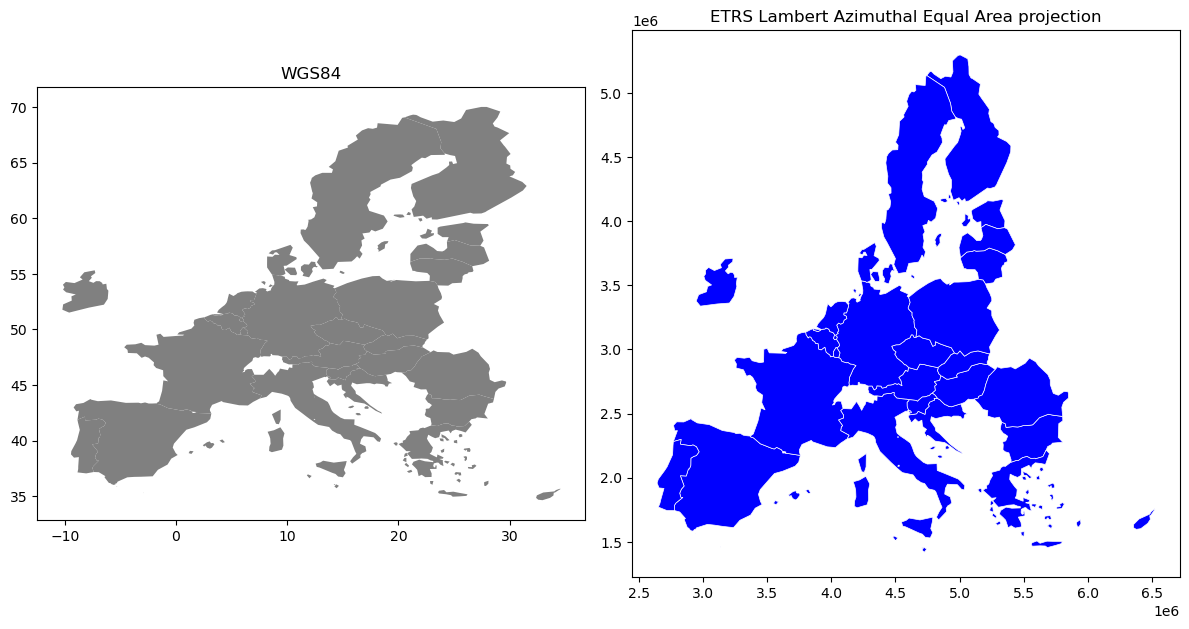

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 12))

data_wgs84.plot(ax=ax1, facecolor="gray")
data.plot(ax=ax2, facecolor="blue", edgecolor="white", lw=0.5)

ax1.set_title("WGS84")
ax2.set_title("ETRS Lambert Azimuthal Equal Area projection")
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

# Remove empty white space around the plot
plt.tight_layout();

In [27]:
# Ouput filepath
outfp = "data/Europe_borders_epsg3035.shp"

# Save to disk
data.to_file(outfp)

## Example of EPSG-3067 for Finland

Very far north, so a special projection is used

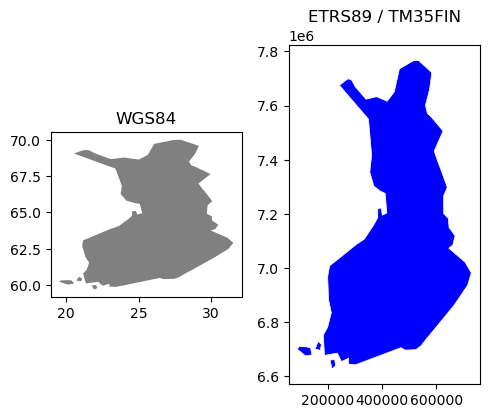

In [28]:
finland_wgs84 = data_wgs84.loc[data_wgs84["NAME_ENGL"] == "Finland"].copy()
finland_etrs89 = finland_wgs84.to_crs(epsg=3067)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(5, 5))
finland_wgs84.plot(ax=ax1, facecolor="gray")
finland_etrs89.plot(ax=ax2, facecolor="blue", edgecolor="white", lw=0.5)

ax1.set_title("WGS84")
ax2.set_title("ETRS89 / TM35FIN")
ax1.set_aspect(aspect=1)
ax2.set_aspect(aspect=1)

plt.tight_layout();

# Parse, define and convert CRS information

In [29]:
from pyproj import CRS

crs_object = CRS.from_epsg(3035)

In [30]:
print(
    f"Name: {crs_object.name}\nCoord system: {crs_object.coordinate_system.name}\n\
Bounds: {crs_object.area_of_use.bounds}\nDatum: {crs_object.datum.name}\n"
)

Name: ETRS89-extended / LAEA Europe
Coord system: cartesian
Bounds: (-35.58, 24.6, 44.83, 84.73)
Datum: European Terrestrial Reference System 1989 ensemble



__export and import to wkt__

In [31]:
crs_wkt = crs_object.to_wkt()
crs_wkt

'PROJCRS["ETRS89-extended / LAEA Europe",BASEGEOGCRS["ETRS89",ENSEMBLE["European Terrestrial Reference System 1989 ensemble",MEMBER["European Terrestrial Reference Frame 1989"],MEMBER["European Terrestrial Reference Frame 1990"],MEMBER["European Terrestrial Reference Frame 1991"],MEMBER["European Terrestrial Reference Frame 1992"],MEMBER["European Terrestrial Reference Frame 1993"],MEMBER["European Terrestrial Reference Frame 1994"],MEMBER["European Terrestrial Reference Frame 1996"],MEMBER["European Terrestrial Reference Frame 1997"],MEMBER["European Terrestrial Reference Frame 2000"],MEMBER["European Terrestrial Reference Frame 2005"],MEMBER["European Terrestrial Reference Frame 2014"],MEMBER["European Terrestrial Reference Frame 2020"],ELLIPSOID["GRS 1980",6378137,298.257222101,LENGTHUNIT["metre",1]],ENSEMBLEACCURACY[0.1]],PRIMEM["Greenwich",0,ANGLEUNIT["degree",0.0174532925199433]],ID["EPSG",4258]],CONVERSION["Europe Equal Area 2001",METHOD["Lambert Azimuthal Equal Area",ID["EPSG",

Retrieving epsg from WKT. If unable to determine automatically, can set a confidence level.

In [32]:
epsg = CRS(crs_wkt).to_epsg()
epsg

3035

In [33]:
CRS(crs_wkt).to_epsg(min_confidence=25)

3035

# CRS from scratch

- Adding a crs to a gdf
- Specifying crs on gdf creation

In [34]:
from shapely.geometry import Point 

gdf = gpd.GeoDataFrame({"geometry": Point(35.106766, -106.629181)}, 
                      index=[0])
print(gdf.crs)

None


In [35]:
from pyproj import CRS

gdf = gdf.set_crs(CRS.from_epsg(4326))
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

Shorthand:

In [36]:
gdf = gdf.set_crs(epsg=4326)
print(gdf.crs)

EPSG:4326


or

In [37]:
gdf = gpd.GeoDataFrame(geometry=[Point(24.950899, 60.169158)], crs="EPSG:4326")
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

# Projection examples

In [38]:
fp = "data/ch6/Natural_Earth/ne_110m_admin_0_countries.zip"

admin = gpd.read_file(fp)
admin.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

__original crs__

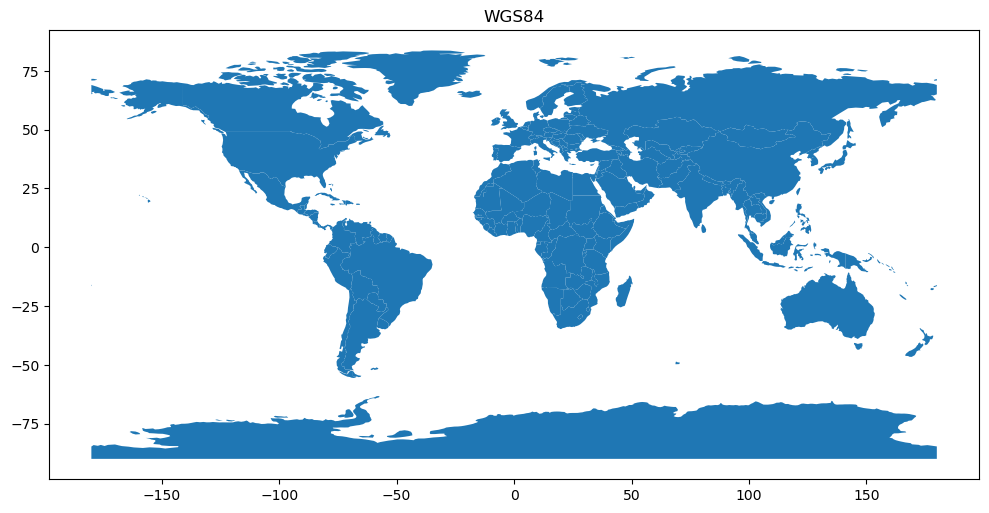

In [39]:
admin.plot(figsize=(12,6))
plt.title("WGS84");

__Mercator projection__

In [40]:
admin.to_crs(epsg=3857).explore()

__Eckert IV__

For less distortion near the poles.

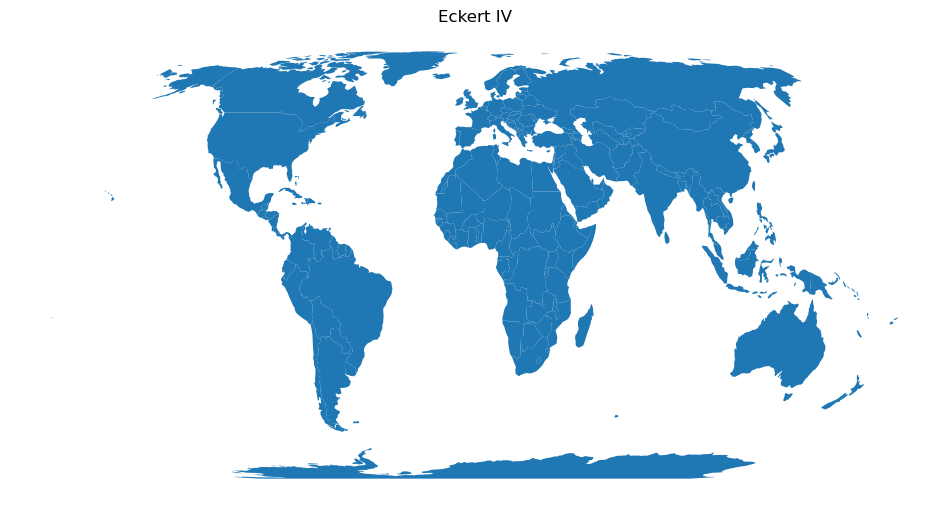

In [42]:
admin.to_crs(crs="ESRI:54012").plot(figsize=(12,12))
plt.title("Eckert IV")
plt.axis("off");

__Orthographic projection__

Specify with proj-string using `+lat, +lon`

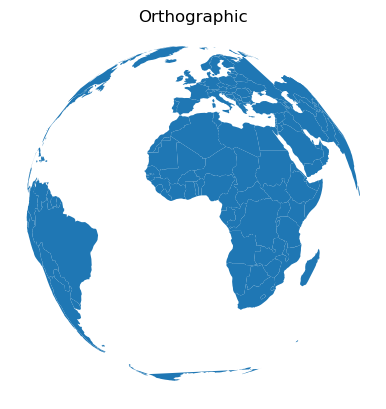

In [43]:
proj_string = "+proj=ortho +lat=60.00 +lon=24.0000"
admin.to_crs(crs=proj_string).plot() 
plt.axis("off")
plt.title("Orthographic");